Matplotlib is building the font cache; this may take a moment.
C:\Users\user\AppData\Local\Temp\ipykernel_10488\663045875.py:17: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed
c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step - loss: 0.0224
Epoch 2/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0011
Epoch 3/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0011
Epoch 4/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 0.0010
Epoch 5/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 8.6458e-04
Epoch 6/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 9.0131e-04
Epoch 7/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 8.0227e-04
Epoch 8/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 6.7998e-04
Epoch 9/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 6.9879e-04
Epoch 10/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 5.9826e-04
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step
Root Mean Squared Error (RMSE): 16.09953946104216


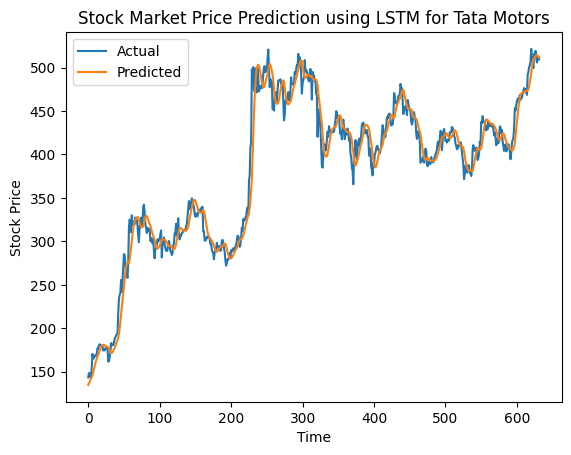

: 

In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# Define the ticker symbol
ticker = "TATAMOTORS.NS"

# Set the start and end dates for the data
start_date = "2010-01-01"
end_date = "2023-05-31"

# Fetch the historical stock prices from Yahoo Finance
data = yf.download(ticker, start=start_date, end=end_date)

# Extract the 'Close' prices
prices = data['Close'].values.reshape(-1, 1)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_prices = scaler.fit_transform(prices)

# Split the data into training and testing sets
train_size = int(len(scaled_prices) * 0.8)
train_data, test_data = scaled_prices[:train_size], scaled_prices[train_size:]

# Prepare the training data for LSTM
def prepare_data(data, time_steps):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i+time_steps])
        y.append(data[i+time_steps])
    return np.array(X), np.array(y)

time_steps = 30  # Number of time steps to consider
X_train, y_train = prepare_data(train_data, time_steps)

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(time_steps, 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Prepare the testing data for LSTM
X_test, y_test = prepare_data(test_data, time_steps)

# Make predictions
predicted = model.predict(X_test)
predicted = scaler.inverse_transform(predicted)

# Evaluate the model
mse = np.mean((predicted - scaler.inverse_transform(y_test)) ** 2)
rmse = np.sqrt(mse)
print('Root Mean Squared Error (RMSE):', rmse)

# Plot the results
plt.plot(scaler.inverse_transform(y_test), label='Actual')
plt.plot(predicted, label='Predicted')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Stock Market Price Prediction using LSTM for Tata Motors')
plt.legend()
plt.show()